In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Load the CSV file
PS122_NUTRIENTS_PS = pd.read_csv('../data/PS122_NUTRIENTS_PS-230508.csv')

# Calculate DIN values
PS122_NUTRIENTS_PS['DIN'] = PS122_NUTRIENTS_PS['N3N2_mean'] + PS122_NUTRIENTS_PS['NH4_mean']
PS122_NUTRIENTS_PS['DSi'] = PS122_NUTRIENTS_PS['Si_mean']

# Extract the desired columns
PS122_NUTRIENTS_PS = PS122_NUTRIENTS_PS[['Date/Time', 'Depth [m]', 'DIN', 'DSi']]

In [3]:
# Load the CSV file
PS122_NUTRIENTS_AWI = pd.read_csv('../data/PS122_NUTRIENTS_AWI-230508.csv')

# Calculate DIN values
PS122_NUTRIENTS_AWI['DIN'] = PS122_NUTRIENTS_AWI['N3N2_mean'] + PS122_NUTRIENTS_AWI['NH4_mean']
PS122_NUTRIENTS_AWI['DSi'] = PS122_NUTRIENTS_AWI['Si_mean']

# Extract the desired columns
PS122_NUTRIENTS_AWI = PS122_NUTRIENTS_AWI[['Date/Time', 'Depth [m]', 'DIN', 'DSi']]

In [4]:
PS122_NUTRIENTS_concat = pd.concat([PS122_NUTRIENTS_PS, PS122_NUTRIENTS_AWI])

In [5]:
# Discard rows with NaN or negative DIN values
PS122_NUTRIENTS = PS122_NUTRIENTS_concat[PS122_NUTRIENTS_concat['DIN'].notna() & (PS122_NUTRIENTS_concat['DIN'] >= 0) & \
                             PS122_NUTRIENTS_concat['DSi'].notna() & (PS122_NUTRIENTS_concat['DSi'] >= 0) ]

# Ensure 'Date/Time' is parsed as a datetime object
PS122_NUTRIENTS['Date/Time'] = pd.to_datetime(PS122_NUTRIENTS['Date/Time'])

# Group by 'Date/Time' and 'Depth [m]' and compute the average DIN value for each group
PS122_NUTRIENTS_grouped = PS122_NUTRIENTS.groupby(['Date/Time', 'Depth [m]']).mean().reset_index()

/tmp/ipykernel_3184950/3251159125.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS122_NUTRIENTS['Date/Time'] = pd.to_datetime(PS122_NUTRIENTS['Date/Time'])


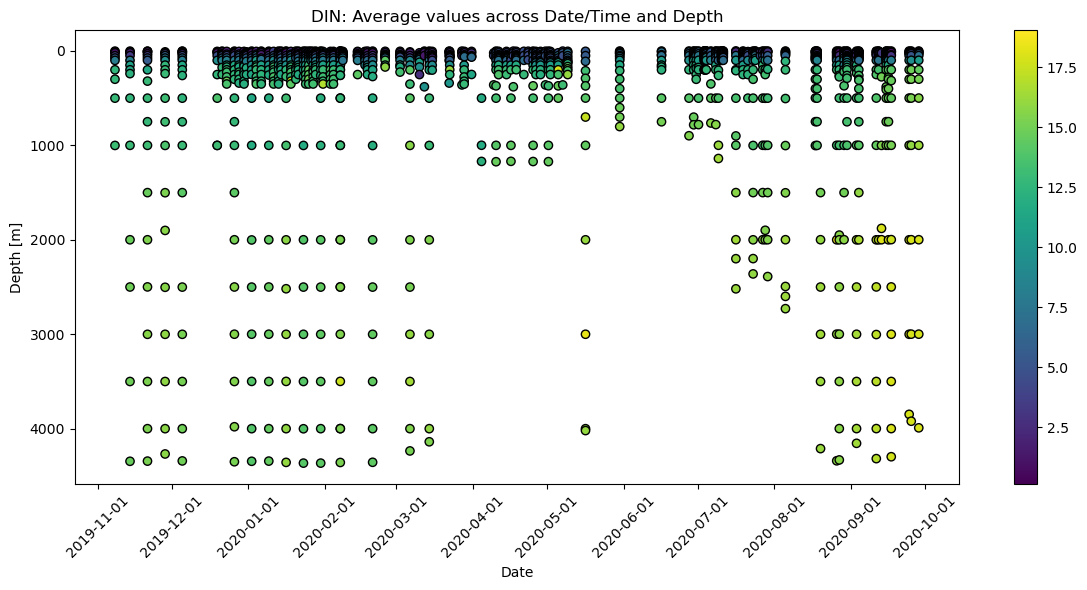

In [6]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot
sc = ax.scatter(PS122_NUTRIENTS_grouped['Date/Time'], PS122_NUTRIENTS_grouped['Depth [m]'], c=PS122_NUTRIENTS_grouped['DIN'], cmap='viridis', marker='o', edgecolor='k')
plt.colorbar(sc) #, label='DIN value'

# Format the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to be months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format major ticks to display YYYY-MM-DD
plt.xticks(rotation=45)

# Other plot settings
ax.invert_yaxis()  # Invert y-axis to display depth correctly
ax.set_xlabel('Date')
ax.set_ylabel('Depth [m]')
ax.set_title('DIN: Average values across Date/Time and Depth')
plt.tight_layout()

plt.show()

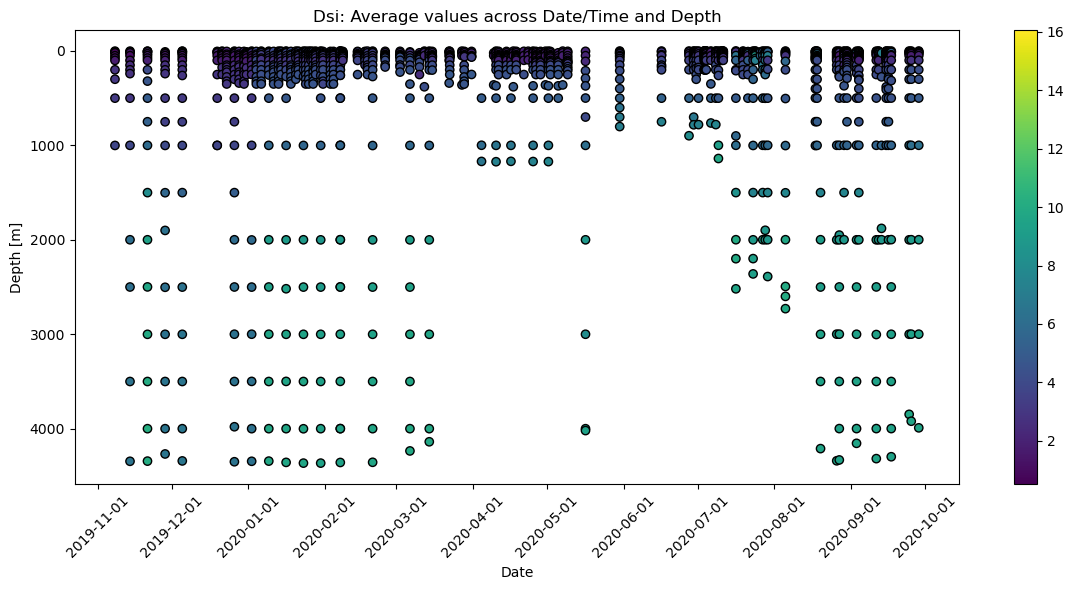

In [7]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot
sc = ax.scatter(PS122_NUTRIENTS_grouped['Date/Time'], PS122_NUTRIENTS_grouped['Depth [m]'], c=PS122_NUTRIENTS_grouped['DSi'], cmap='viridis', marker='o', edgecolor='k')
plt.colorbar(sc) #, label='DIN value'

# Format the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to be months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format major ticks to display YYYY-MM-DD
plt.xticks(rotation=45)

# Other plot settings
ax.invert_yaxis()  # Invert y-axis to display depth correctly
ax.set_xlabel('Date')
ax.set_ylabel('Depth [m]')
ax.set_title('Dsi: Average values across Date/Time and Depth')
plt.tight_layout()

plt.show()

In [8]:
import xarray as xr
REcoM1D_mesh = xr.open_dataset("../data/MESH/REcoM1D_mesh.nc")
mod_depths = REcoM1D_mesh.Z.values
depth_bounds = -REcoM1D_mesh.zbar.values
depth_bounds

array([-0.00e+00,  5.00e+00,  1.00e+01,  2.00e+01,  3.00e+01,  4.00e+01,
        5.00e+01,  6.00e+01,  7.00e+01,  8.00e+01,  9.00e+01,  1.00e+02,
        1.15e+02,  1.35e+02,  1.60e+02,  1.90e+02,  2.30e+02,  2.80e+02,
        3.40e+02,  4.10e+02,  4.90e+02,  5.80e+02,  6.80e+02,  7.90e+02,
        9.10e+02,  1.04e+03,  1.18e+03,  1.33e+03,  1.50e+03,  1.70e+03,
        1.92e+03,  2.15e+03,  2.40e+03,  2.65e+03,  2.90e+03,  3.15e+03,
        3.40e+03,  3.65e+03,  3.90e+03,  4.15e+03,  4.40e+03,  4.65e+03,
        4.90e+03,  5.15e+03,  5.40e+03,  5.65e+03,  6.00e+03,  6.25e+03])

In [9]:
PS122_NUTRIENTS_grouped['Depth_Bin'] = pd.cut(PS122_NUTRIENTS_grouped['Depth [m]'], bins=depth_bounds)
PS122_NUTRIENTS_grouped_binned = PS122_NUTRIENTS_grouped.groupby(['Date/Time', 'Depth_Bin']).mean().reset_index()

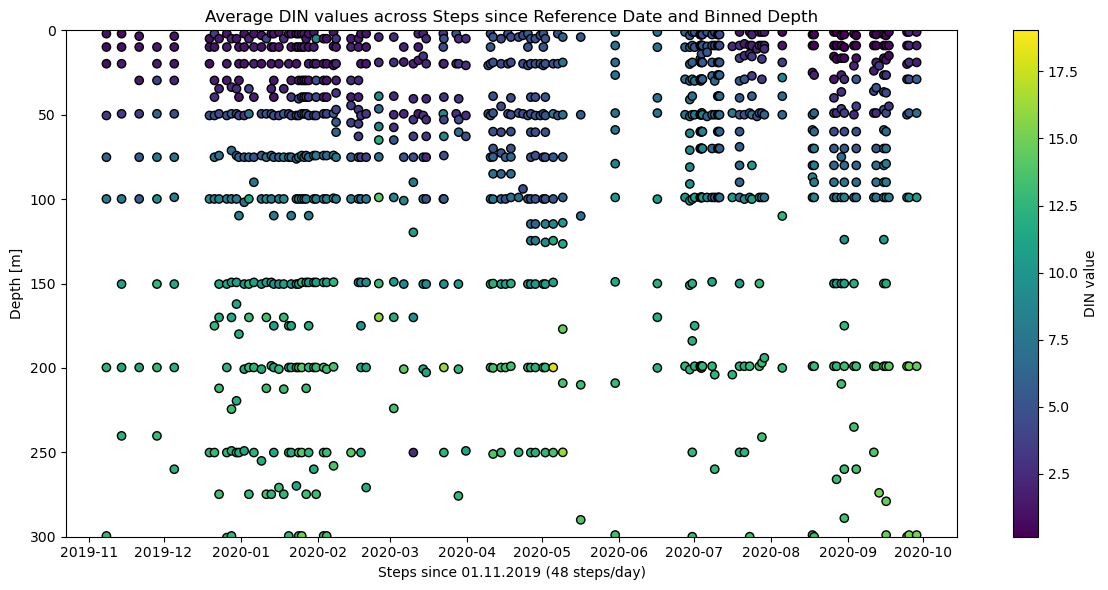

In [10]:
# Plotting the data against the new 'Step' column and binned depth
plt.figure(figsize=(12, 6))
sc = plt.scatter(PS122_NUTRIENTS_grouped_binned['Date/Time'], 
                 PS122_NUTRIENTS_grouped_binned['Depth [m]'], 
                 c=PS122_NUTRIENTS_grouped_binned['DIN'], 
                 cmap='viridis', marker='o', edgecolor='k')
plt.colorbar(sc, label='DIN value')
plt.ylim([0,300])
plt.gca().invert_yaxis()  # Invert y-axis for depth
plt.xlabel('Steps since 01.11.2019 (48 steps/day)')
plt.ylabel('Depth [m]')
plt.title('Average DIN values across Steps since Reference Date and Binned Depth')
plt.tight_layout()

plt.show()

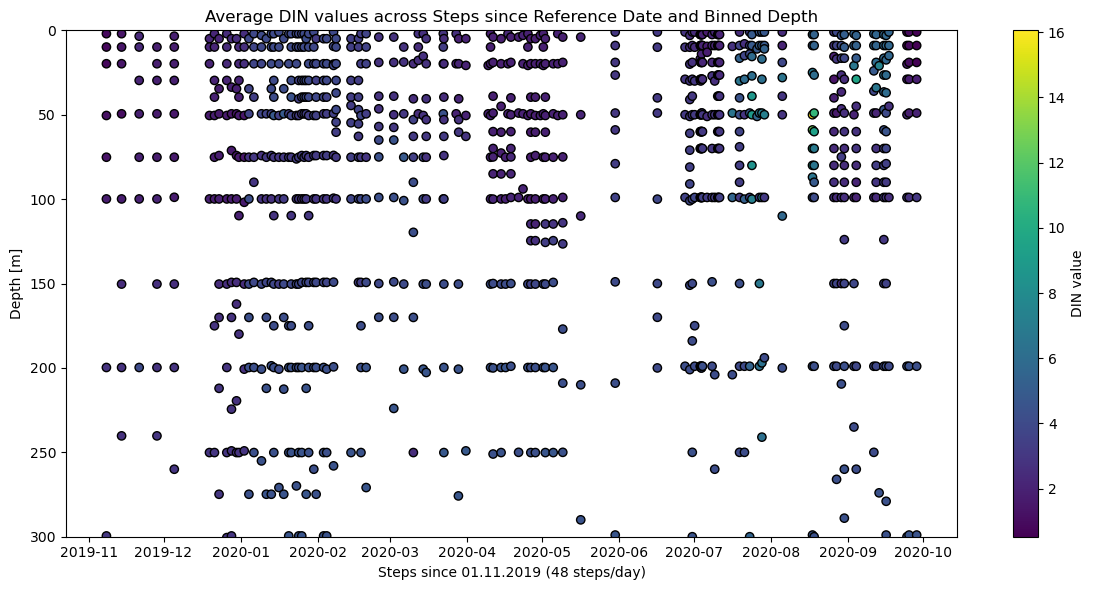

In [11]:
# Plotting the data against the new 'Step' column and binned depth
plt.figure(figsize=(12, 6))
sc = plt.scatter(PS122_NUTRIENTS_grouped_binned['Date/Time'], 
                 PS122_NUTRIENTS_grouped_binned['Depth [m]'], 
                 c=PS122_NUTRIENTS_grouped_binned['DSi'], 
                 cmap='viridis', marker='o', edgecolor='k')
plt.colorbar(sc, label='DIN value')
plt.ylim([0,300])
plt.gca().invert_yaxis()  # Invert y-axis for depth
plt.xlabel('Steps since 01.11.2019 (48 steps/day)')
plt.ylabel('Depth [m]')
plt.title('Average DIN values across Steps since Reference Date and Binned Depth')
plt.tight_layout()

plt.show()

In [12]:
# Convert 'Date/Time' to step values using the provided function
def date_to_step(date, reference_date=np.datetime64('2019-11-01')):
    date = np.datetime64(date)
    reference_date = np.datetime64(reference_date)
    days_difference = (date - reference_date).astype('timedelta64[D]').item().days
    time_step = days_difference * 48
    return time_step

In [13]:
PS122_NUTRIENTS_grouped_binned['Step'] = PS122_NUTRIENTS_grouped_binned['Date/Time'].apply(date_to_step)

In [14]:
# Group by 'Step' and 'Depth [m]' and compute the average DIN value for each group
PS122_NUTRIENTS_grouped_binned = PS122_NUTRIENTS_grouped_binned.groupby(['Step', 'Depth [m]']).mean().reset_index()

# Binning the data based on the provided depth bounds
PS122_NUTRIENTS_grouped_binned['Depth_Bin'] = pd.cut(PS122_NUTRIENTS_grouped_binned['Depth [m]'], bins=depth_bounds)
PS122_NUTRIENTS_grouped_binned_data = PS122_NUTRIENTS_grouped_binned.groupby(['Step', 'Depth_Bin']).mean().reset_index()

/tmp/ipykernel_3184950/3557473868.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  PS122_NUTRIENTS_grouped_binned = PS122_NUTRIENTS_grouped_binned.groupby(['Step', 'Depth [m]']).mean().reset_index()


In [15]:
from netCDF4 import Dataset
# Create a new NetCDF file
ncfile = Dataset('../data/PS122_NUTRIENTS.nc', 'w', format='NETCDF4_CLASSIC')

# Define the 'step' dimension and coordinate
step_dim = ncfile.createDimension('step', len(PS122_NUTRIENTS_grouped_binned_data['Step'].unique()))
step_var = ncfile.createVariable('step', np.int32, ('step',))
step_var[:] = PS122_NUTRIENTS_grouped_binned_data['Step'].unique() + (200*48 + 24)
# step_var[:] = PS122_NUTRIENTS_grouped_binned_data['Step'].unique()
step_var.units = 'Model Time Steps of the observation'

# Define the 'depth' dimension and coordinate
depth_dim = ncfile.createDimension('depth', len(mod_depths))
depth_var = ncfile.createVariable('depth', np.float64, ('depth',))
depth_var[:] = mod_depths 
depth_var.units = 'meters'

# Fill NaN values with -99.99 in 'DIN' column
PS122_NUTRIENTS_grouped_binned_data['DIN'].fillna(-99.99, inplace=True)
# Define the 'DIN' variable and assign the data to it
din_var = ncfile.createVariable('DIN', np.float64, ('step', 'depth'))
din_pivot = PS122_NUTRIENTS_grouped_binned_data.pivot(index='Step', columns='Depth_Bin', values='DIN')
din_var[:, :] = din_pivot.values
din_var.units = 'mgm-3'  # You can specify the correct unit here

# Fill NaN values with -99.99 in 'DSi' column
PS122_NUTRIENTS_grouped_binned_data['DSi'].fillna(-99.99, inplace=True)
# Define the 'DSi' variable and assign the data to it
dsi_var = ncfile.createVariable('DSi', np.float64, ('step', 'depth'))
dsi_pivot = PS122_NUTRIENTS_grouped_binned_data.pivot(index='Step', columns='Depth_Bin', values='DSi')
dsi_var[:, :] = dsi_pivot.values
dsi_var.units = 'mgm-3'  # You can specify the correct unit here

# Add global attributes (optional)
ncfile.description = 'Average DIN and DSi values across Steps and Depth'
ncfile.source = 'PS122_NUTRIENTS_PS-230508.csv'

# Close the NetCDF file
ncfile.close()

In [16]:
NUTRIENTS_ds = xr.open_dataset('../data/PS122_NUTRIENTS.nc')
NUTRIENTS_ds

<xarray.Dataset>
Dimensions:  (step: 111, depth: 47)
Coordinates:
  * step     (step) int32 9960 10248 10584 10920 ... 25032 25368 25416 25560
  * depth    (depth) float64 -2.5 -7.5 -15.0 ... -5.825e+03 -6.125e+03
Data variables:
    DIN      (step, depth) float64 ...
    DSi      (step, depth) float64 ...
Attributes:
    description:  Average DIN and DSi values across Steps and Depth
    source:       PS122_NUTRIENTS_PS-230508.csv

In [17]:
# Extract data values for plotting
step_values = NUTRIENTS_ds['step'].values
depth_values = NUTRIENTS_ds['depth'].values
din_values = NUTRIENTS_ds['DIN'].values
# Replace values less than zero with NaN
din_values = np.where(din_values < 0, np.nan, din_values)

dsi_values = NUTRIENTS_ds['DSi'].values
# Replace values less than zero with NaN
dsi_values = np.where(dsi_values < 0, np.nan, dsi_values)

# Create a meshgrid for the scatter plot
step_mesh, depth_mesh = np.meshgrid(step_values, depth_values)

# Flatten the arrays for scatter plotting
step_flat = step_mesh.flatten()
depth_flat = depth_mesh.flatten()
din_flat = din_values.flatten()
dsi_flat = dsi_values.flatten()

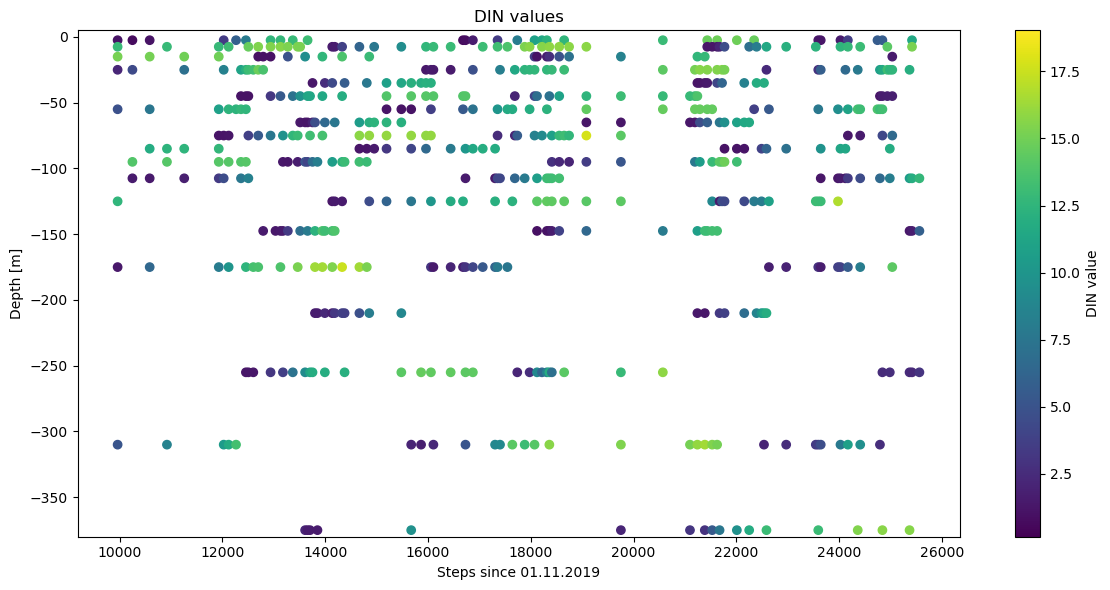

In [18]:
# Scatter plot
plt.figure(figsize=(12, 6))
sc = plt.scatter(step_flat, depth_flat, c=din_flat, cmap='viridis', marker='o') # , edgecolor='k'
plt.colorbar(sc, label='DIN value')
plt.xlabel('Steps since 01.11.2019')
plt.ylabel('Depth [m]')
plt.ylim([-380,5])
plt.title('DIN values')
plt.tight_layout()

plt.show()

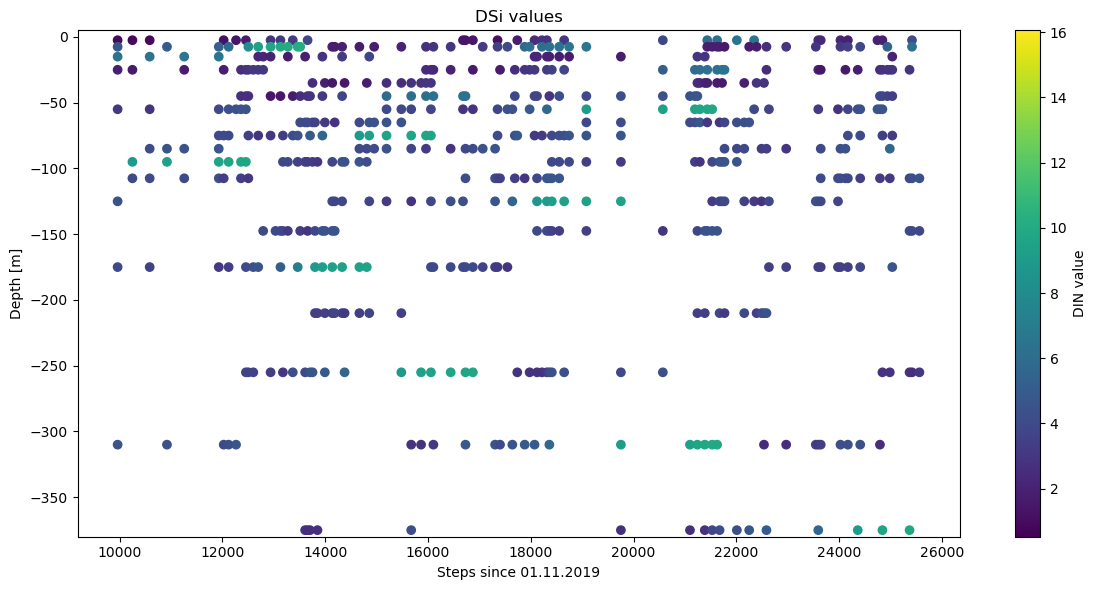

In [19]:
# Scatter plot
plt.figure(figsize=(12, 6))
sc = plt.scatter(step_flat, depth_flat, c=dsi_flat, cmap='viridis', marker='o') # , edgecolor='k'
plt.colorbar(sc, label='DIN value')
plt.xlabel('Steps since 01.11.2019')
plt.ylabel('Depth [m]')
plt.ylim([-380,5])
plt.title('DSi values')
plt.tight_layout()

plt.show()

In [20]:
# Extract data values for plotting
step_values = NUTRIENTS_ds['step'].values
depth_values = NUTRIENTS_ds['depth'].values
din_values = NUTRIENTS_ds['DIN'].values
# Replace values less than zero with NaN
din_values = np.where(din_values < 0, np.nan, din_values)

dsi_values = NUTRIENTS_ds['DSi'].values
# Replace values less than zero with NaN
dsi_values = np.where(dsi_values < 0, np.nan, dsi_values)

# Create a meshgrid for the scatter plot
depth_mesh, step_mesh= np.meshgrid(depth_values, step_values)

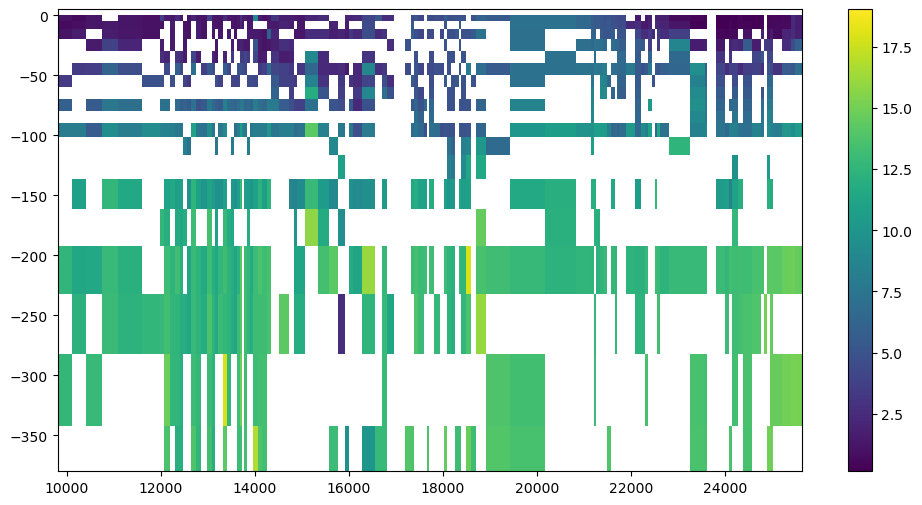

In [21]:
plt.figure(figsize=(12, 6))
plt.pcolormesh(step_mesh, depth_mesh, din_values)
plt.colorbar()
plt.ylim([-380,5])
plt.show()

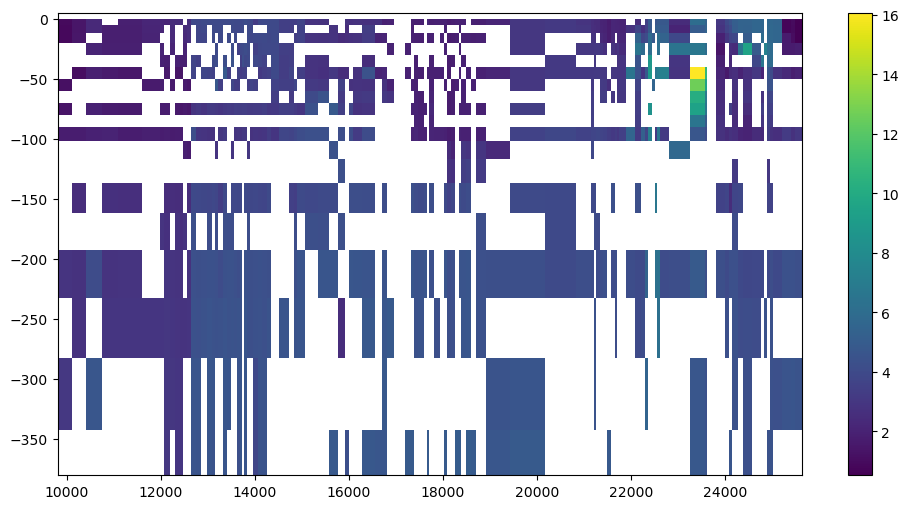

In [22]:
plt.figure(figsize=(12, 6))
plt.pcolormesh(step_mesh, depth_mesh, dsi_values)
plt.colorbar()
plt.ylim([-380,5])
plt.show()